<a href="https://colab.research.google.com/github/LuisGSVasconcelos/Redes_Neurais_PPGEQ_UFCG/blob/main/Victor/11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 11.2 Process Modeling via FFNN for Combined Cycle Power Plant (CCPP)

In [ ]:
# import required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read data
data = pd.read_excel('Folds5x2_pp.xlsx', usecols = 'A:E').values
X = data[:,0:4]
y = data[:,4][:,np.newaxis]

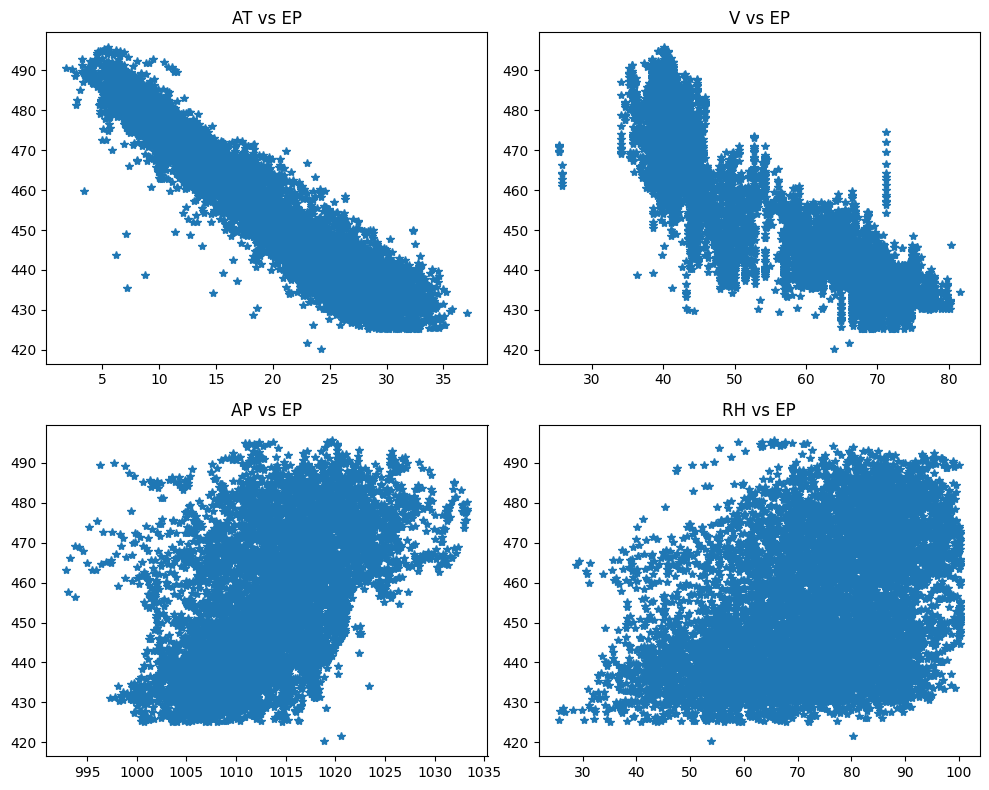

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].plot(X[:, 0], y, '*')
axs[0, 0].set_title('AT vs EP')

axs[0, 1].plot(X[:, 1], y, '*')
axs[0, 1].set_title('V vs EP')

axs[1, 0].plot(X[:, 2], y, '*')
axs[1, 0].set_title('AP vs EP')

axs[1, 1].plot(X[:, 3], y, '*')
axs[1, 1].set_title('RH vs EP')

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

In [ ]:
# import required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read data
data = pd.read_excel('Folds5x2_pp.xlsx', usecols = 'A:E').values
X = data[:,0:4]
y = data[:,4][:,np.newaxis]

In [ ]:
# separate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
#%% import Keras libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# define model
model = Sequential()
model.add(Dense(8, activation='relu', kernel_initializer='he_normal', input_shape=(4,))) # 8 neurons in 1st hidden layer; this hidden layer accepts data from a 4 dimensional input
model.add(Dense(5, activation='relu', kernel_initializer='he_normal')) # 5 neurons in 2nd layer
model.add(Dense(1)) # output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile model
model.compile(loss='mse', optimizer='Adam') # mean-squared error is to be minimized

In [ ]:
# fit model
model.fit(X_train_scaled, y_train_scaled, epochs=25, batch_size=50)

Epoch 1/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4985
Epoch 2/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1821
Epoch 3/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1027
Epoch 4/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0829
Epoch 5/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0763
Epoch 6/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0701
Epoch 7/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0699
Epoch 8/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0642
Epoch 9/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0668
Epoch 10/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0630
Epoch 11/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0626
Epoch 12/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0614
Epoch 13/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0612
Epoch 14/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0613
Epoch 15/25
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


Text(0, 0.5, 'y_test_pred')

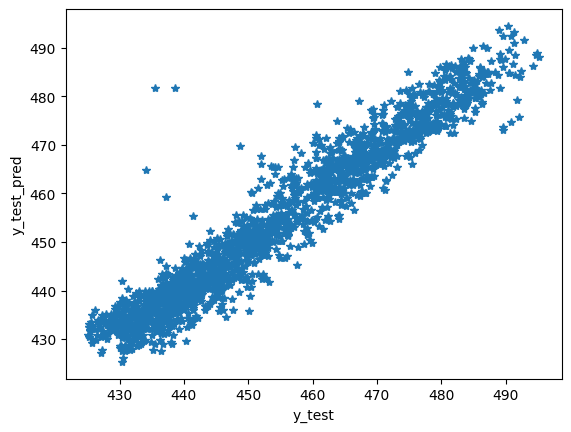

In [ ]:
# predict y_test
y_test_scaled_pred = model.predict(X_test_scaled)
y_test_pred = y_scaler.inverse_transform(y_test_scaled_pred)

plt.figure()
plt.plot(y_test, y_test_pred, '*')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [ ]:
# metrics
from sklearn.metrics import r2_score
print('R2:', r2_score(y_test, y_test_pred))

R2: 0.9311043669765589


In [ ]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275 (1.08 KB)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 184 (740.00 B)

## 11.4 Non-linearity in Neural Nets (width vs depth)

In [ ]:
# import required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# random number seed for result reproducibility
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

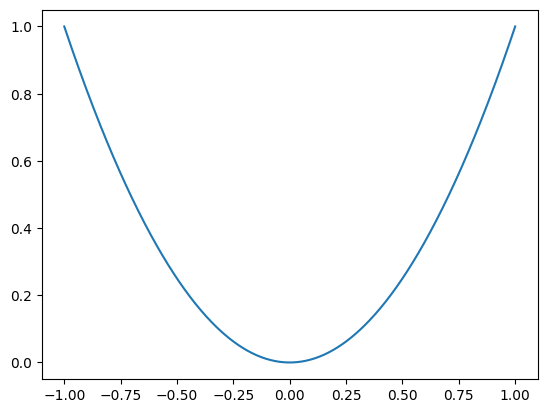

In [ ]:
# generate data
x = np.linspace(-1,1,500)
y = x*x
plt.plot(x,y)

In [ ]:
#%% import Keras libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# define model
n_nodes = 5

model = Sequential()
model.add(Dense(n_nodes, activation='relu', input_shape=(1,)))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile model
model.compile(loss='mse', optimizer=Adam(learning_rate=0.05))

Epoch 1/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0278  
Epoch 2/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082  
Epoch 3/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0049 
Epoch 4/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 
Epoch 5/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 
Epoch 6/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012 
Epoch 7/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5422e-04 
Epoch 8/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.6655e-04 
Epoch 9/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2989e-04 
Epoch 10/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.1149e-04 
Epoch 11/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9749e-04 
Epoch 12/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.8748e-04 
Epoch 13/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8786e-04 
Epoch 14/400
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8696e-04 
Epoch 15/400
10/10 ━━━━

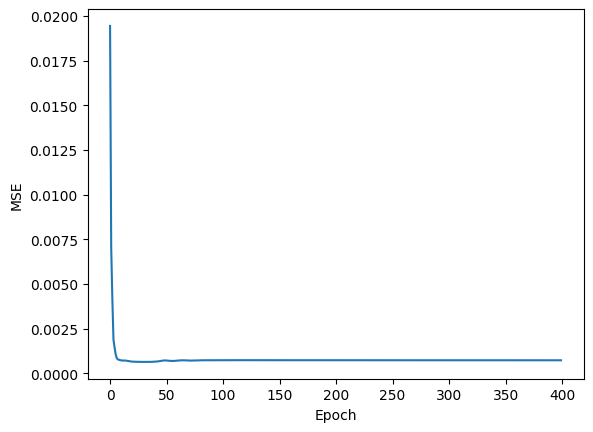

In [ ]:
# fit model
history = model.fit(x, y, epochs=400, batch_size=50)

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='train')
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


Text(0.5, 1.0, 'y_pred')

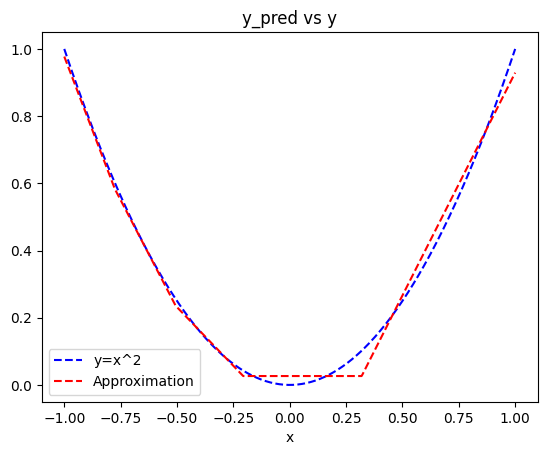

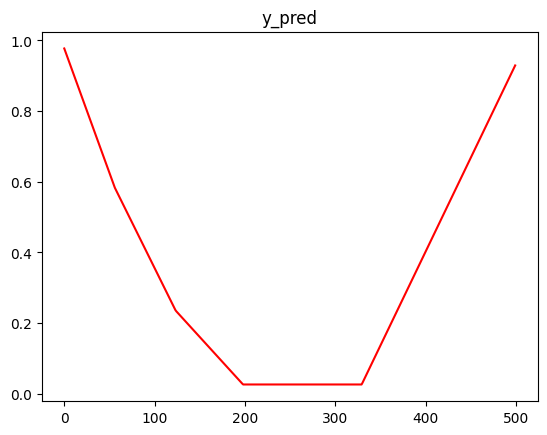

In [ ]:
# predict y_test
y_pred = model.predict(x)

plt.figure()
plt.plot(x, y, '--b', label='y=x^2')
plt.plot(x, y_pred, '--r', label='Approximation')
plt.xlabel('x')
plt.title('y_pred vs y')
plt.legend()

plt.figure()
plt.plot(y_pred, 'r')
plt.title('y_pred')

In [ ]:
# metrics
from sklearn.metrics import r2_score
print('R2:', r2_score(y_test, y_test_pred))

R2: 0.9311043669765589


In [ ]:
import tensorflow.keras.backend as K
activations = []
for layer in model.layers:
    keras_function = K.function([model.input], [layer.output])
    activations.append(keras_function(x))

AttributeError: module 'tensorflow.keras.backend' has no attribute 'function'

In [ ]:
# plot activations
layer1_activations = activations[0][0]
for node in range(n_nodes):
    plt.figure()
    plt.plot(x, layer1_activations[:,node])
    plt.title('node ' + str(node+1) + ' activation')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

<Figure size 640x480 with 0 Axes>

## 11.5 Neural Net Hyperparameter Optimization

In [ ]:
# import required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read data
data = pd.read_excel('Folds5x2_pp.xlsx', usecols = 'A:E').values
X = data[:,0:4]
y = data[:,4][:,np.newaxis]

In [ ]:
# separate train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
X_est, X_val, y_est, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_est_scaled = X_scaler.fit_transform(X_est)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_est_scaled = y_scaler.fit_transform(y_est)
y_val_scaled = y_scaler.transform(y_val)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
# import packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [ ]:
# model function
def FFNN_model(hidden_layers, layer_size, regularizationValue, learningRate):
    model = Sequential()
    model.add(Dense(layer_size, kernel_regularizer=regularizers.L1(regularizationValue), activation='relu', kernel_initializer='he_normal', input_shape=(4,)))

    for _ in range(hidden_layers-1):
        model.add(Dense(layer_size, kernel_regularizer=regularizers.L1(regularizationValue), activation='relu', kernel_initializer='he_normal'))

    model.add(Dense(1))
    model.compile(loss='mse', optimizer=Adam(learning_rate=learningRate))

    return model

In [ ]:
# KerasRegressor
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor # Original import
from scikeras.wrappers import KerasRegressor # Corrected import

# Note: The rest of your code using KerasRegressor should work with this change.
model = KerasRegressor(build_fn=FFNN_model, epochs=25, batch_size=50)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "model__hidden_layers": [1, 2],
    "model__layer_size": np.arange(1, 10),
    "model__regularizationValue": [0.001, 0.01, 0.1],
    "model__learningRate": [0.05, 0.01, 0.1]
}

grid_searchcv = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_searchcv.fit(X_est_scaled, y_est_scaled)

print("The best parameters obtained are:", grid_searchcv.best_params_)

C:\Users\VH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\VH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3.5571
Epoch 2/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1418
Epoch 3/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1191
Epoch 4/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1066
Epoch 5/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1011
Epoch 6/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0955
Epoch 7/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0981
Epoch 8/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0928
Epoch 9/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0907
Epoch 10/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0920
Epoch 11/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0957
Epoch 12/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0881
Epoch 13/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0868
Epoch 14/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0867
Epoch 15/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

In [ ]:
# best model
model = grid_searchcv.best_estimator_.model

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


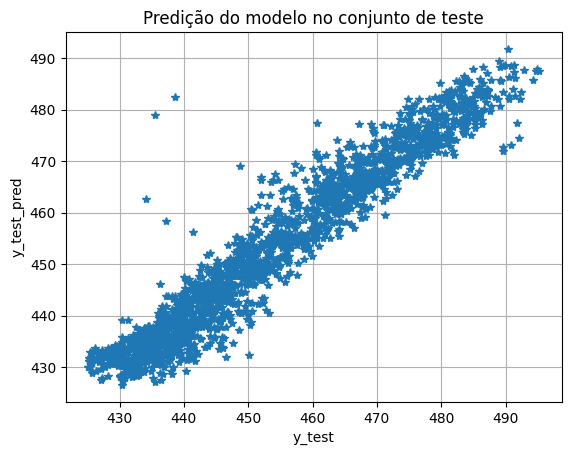

In [ ]:
# predict y_test
best_model = grid_searchcv.best_estimator_
y_test_scaled_pred = best_model.predict(X_test_scaled)
y_test_pred = y_scaler.inverse_transform(y_test_scaled_pred.reshape(-1, 1))

# Plot
import matplotlib.pyplot as plt

plt.figure()
plt.plot(y_test, y_test_pred, '*')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.title('Predição do modelo no conjunto de teste')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import r2_score

# Se ainda não fez:
best_model = grid_searchcv.best_estimator_
y_test_scaled_pred = best_model.predict(X_test_scaled)

# Se o y foi escalado, desescalone antes da métrica:
y_test_pred = y_scaler.inverse_transform(y_test_scaled_pred.reshape(-1, 1)).ravel()

# R² score
print('R2:', r2_score(y_test, y_test_pred))

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R2: 0.9278415926957715


## 11.6 Strategies for Improved Network Training

In [ ]:
# import required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# random number seed for result reproducibility
from numpy.random import seed
seed(10)
import tensorflow
tensorflow.random.set_seed(20)

In [ ]:
# fetch data
data = pd.read_csv('kamyr-digester.csv', usecols = range(1,23))

In [ ]:
# pre-process
# find the # of nan entries in each column
na_counts = data.isna().sum(axis = 0)

# remove columns that have a lot of nan entries
data_cleaned = data.drop(columns = ['AAWhiteSt-4 ','SulphidityL-4 '])

# remove any row that have any nan entry
data_cleaned = data_cleaned.dropna(axis = 0)

# separate X, y
y = data_cleaned.iloc[:,0].values[:,np.newaxis] # StandardScaler requires 2D array
X = data_cleaned.iloc[:,1:].values

print('Number of samples left: ', X.shape[0])

Number of samples left:  263


In [ ]:
# separate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
X_est, X_val, y_est, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 100)

In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_est_scaled = X_scaler.fit_transform(X_est)
X_val_scaled = X_scaler.transform(X_val)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_est_scaled = y_scaler.fit_transform(y_est)
y_val_scaled = y_scaler.transform(y_val)
y_test_scaled = y_scaler.transform(y_test)

In [ ]:
#%% import Keras libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# define model
def FFNN_model():
    model = Sequential()
    model.add(Dense(20, activation='tanh', kernel_initializer='he_normal', input_shape=(19,)))
    model.add(Dense(5, activation='tanh', kernel_initializer='he_normal'))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='Adam')
    return model

In [ ]:
# fit model
history = FFNN_model().fit(X_est_scaled, y_est_scaled, epochs=250, batch_size=32, validation_data=(X_val_scaled, y_val_scaled))

Epoch 1/250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - loss: 1.0282 - val_loss: 1.0256
Epoch 2/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8913 - val_loss: 0.9716
Epoch 3/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.7967 - val_loss: 0.9277
Epoch 4/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.7233 - val_loss: 0.8910
Epoch 5/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.6651 - val_loss: 0.8595
Epoch 6/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.6181 - val_loss: 0.8319
Epoch 7/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5794 - val_loss: 0.8071
Epoch 8/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5469 - val_loss: 0.7845
Epoch 9/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5192 - val_loss: 0.7641
Epoch 10/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4955 - val_loss: 0.7454
Epoch 11/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4749 - val_loss: 0.7286
Epoch 12/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4569 - val_loss: 0.7135


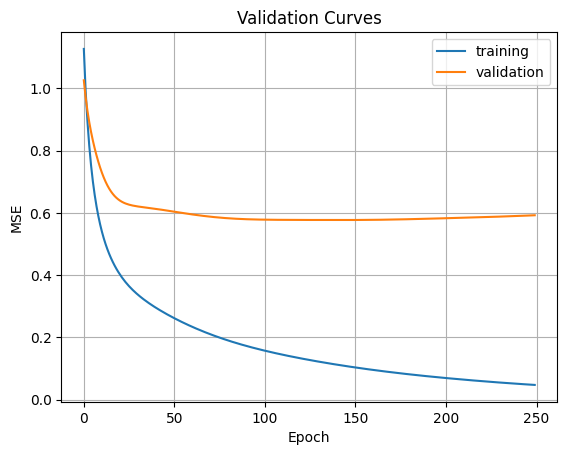

In [ ]:
# plot validation curve
plt.figure()
plt.title('Validation Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# random number seed for result reproducibility
from numpy.random import seed
seed(10)
import tensorflow
tensorflow.random.set_seed(20)

In [ ]:
# fit model again with early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=15)

history = FFNN_model().fit(X_est_scaled, y_est_scaled, epochs=250, batch_size=32, validation_data=(X_val_scaled, y_val_scaled), callbacks=es)

Epoch 1/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step - loss: 1.9878 - val_loss: 1.3620
Epoch 2/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.8006 - val_loss: 1.2408
Epoch 3/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1.6375 - val_loss: 1.1369
Epoch 4/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 1.4907 - val_loss: 1.0484
Epoch 5/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.3588 - val_loss: 0.9736
Epoch 6/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2402 - val_loss: 0.9102
Epoch 7/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.1331 - val_loss: 0.8563
Epoch 8/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.0362 - val_loss: 0.8105
Epoch 9/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9485 - val_loss: 0.7713
Epoch 10/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8692 - val_loss: 0.7379
Epoch 11/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7977 - val_loss: 0.7095
Epoch 12/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7335 - val_l

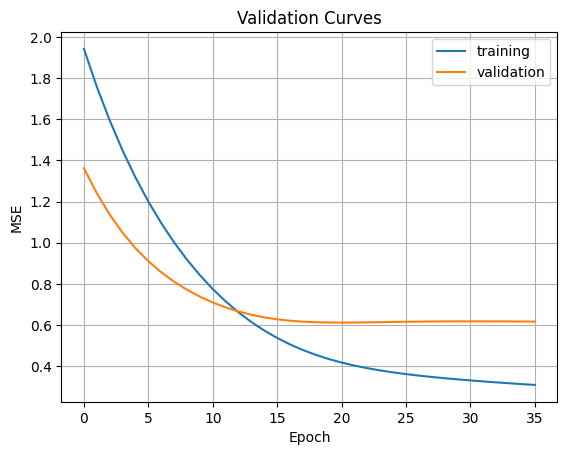

In [ ]:
# plot validation curve
plt.figure()
plt.title('Validation Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.grid()
plt.show()

## 11.7 Soft Sensing via FFNN for Debutanizer Column in a Petroleum Refinery

In [ ]:
# import required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read data
data = np.loadtxt('debutanizer_data.txt', skiprows=5)

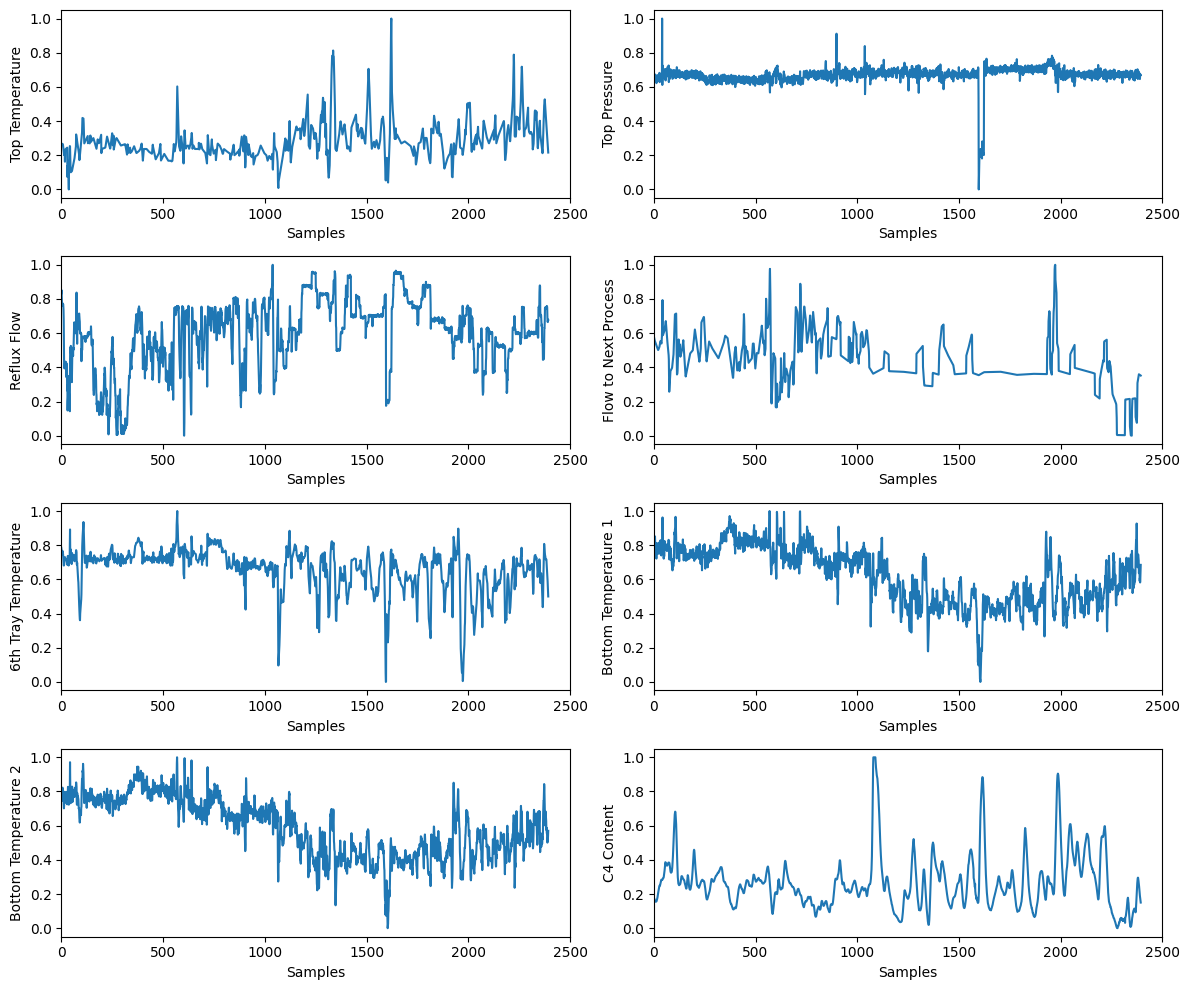

In [ ]:
import matplotlib.pyplot as plt

labels = [
    'Top Temperature', 'Top Pressure', 'Reflux Flow',
    'Flow to Next Process', '6th Tray Temperature',
    'Bottom Temperature 1', 'Bottom Temperature 2', 'C4 Content'
]

fig, axs = plt.subplots(4, 2, figsize=(12, 10))
axs = axs.flatten()  # transforma em array 1D para iterar facilmente

for i in range(8):
    axs[i].plot(data[:, i])
    axs[i].set_ylabel(labels[i])
    axs[i].set_xlabel('Samples')
    axs[i].set_xlim((0, 2500))

plt.tight_layout()
plt.show()


In [ ]:
# import required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# read data
data = np.loadtxt('debutanizer_data.txt', skiprows=5)

In [ ]:
# separate train and test data
from sklearn.model_selection import train_test_split
X = data[:,0:-1]
y = data[:,-1][:,np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)

In [ ]:
# scale data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_train_normal = X_scaler.fit_transform(X_train)
X_test_normal = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_normal = y_scaler.fit_transform(y_train)
y_test_normal = y_scaler.transform(y_test)

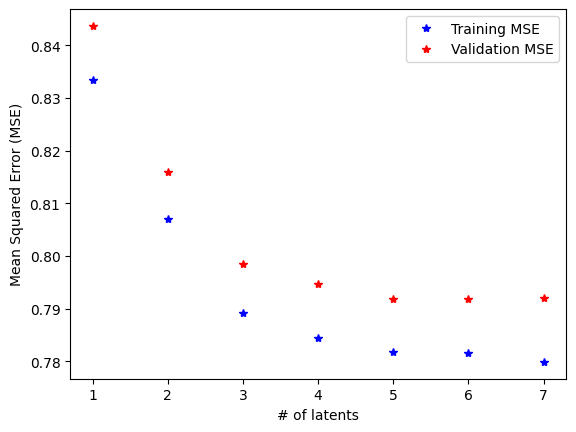

In [ ]:
# Finding # latents using kFold cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression

scaler = StandardScaler()

fit_MSE = []
validate_MSE = []
for n_comp in range(1,8):
    local_fit_MSE = []
    local_validate_MSE = []

    kfold = KFold(n_splits = 10, shuffle = True, random_state = 100)
    for fit_index, validate_index in kfold.split(y_train):
        X_fit_normal = scaler.fit_transform(X_train[fit_index])
        X_validate_normal = scaler.transform(X_train[validate_index])

        y_fit_normal = scaler.fit_transform(y_train[fit_index])
        y_validate_normal = scaler.transform(y_train[validate_index])

        pls = PLSRegression(n_components = n_comp)
        pls.fit(X_fit_normal, y_fit_normal)

        local_fit_MSE.append(mean_squared_error(y_fit_normal, pls.predict(X_fit_normal)))
        local_validate_MSE.append(mean_squared_error(y_validate_normal,
                                                        pls.predict(X_validate_normal)))

    fit_MSE.append(np.mean(local_fit_MSE))
    validate_MSE.append(np.mean(local_validate_MSE))


# plot
plt.figure()
plt.plot(range(1,8), fit_MSE, 'b*', label = 'Training MSE')
plt.plot(range(1,8), validate_MSE, 'r*', label = 'Validation MSE')
plt.xticks(range(1,8))
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('# of latents')
plt.legend()

In [ ]:
# build PLS model
pls = PLSRegression(n_components = 5)
pls.fit(X_train_normal, y_train_normal)

PLSRegression(n_components=5)

In [ ]:
# check training vs test accuracy
print('Accuracy over training data: ', pls.score(X_train_normal, y_train_normal))
print('Accuracy over test data: ', pls.score(X_test_normal, y_test_normal))

Accuracy over training data:  0.21790060542840162
Accuracy over test data:  0.1882053961720188


Text(0, 0.5, 'C4 content (prediction)')

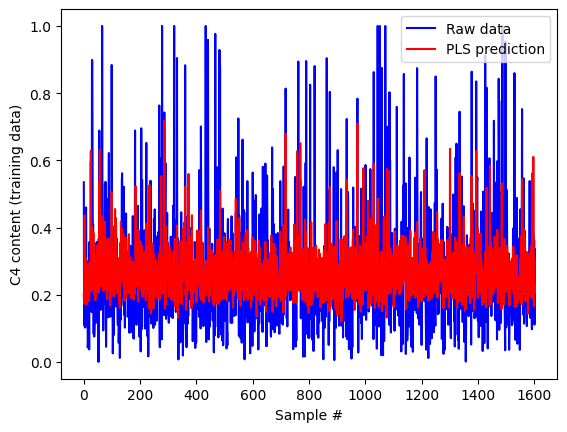

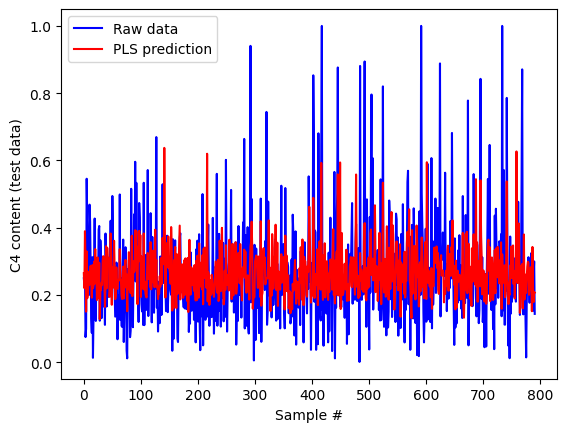

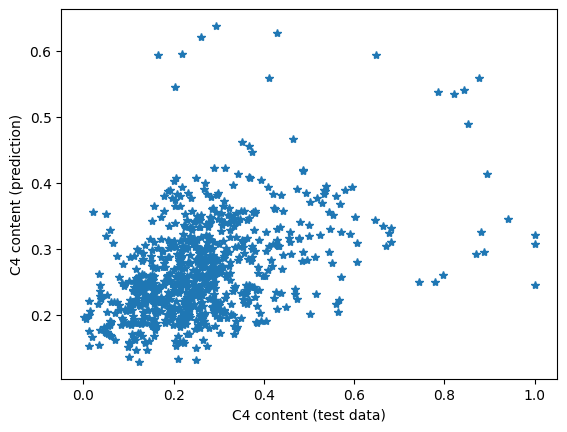

In [ ]:
# plots of raw and predicted data
y_train_normal_predict = pls.predict(X_train_normal)
y_test_normal_predict = pls.predict(X_test_normal)

y_train_predict = y_scaler.inverse_transform(y_train_normal_predict)
y_test_predict = y_scaler.inverse_transform(y_test_normal_predict)


plt.figure()
plt.plot(y_train, 'b',  label = 'Raw data')
plt.plot(y_train_predict, 'r', label = 'PLS prediction')
plt.ylabel('C4 content (training data)')
plt.xlabel('Sample #')
plt.legend()


plt.figure()
plt.plot(y_test, 'b',  label = 'Raw data')
plt.plot(y_test_predict, 'r',  label = 'PLS prediction')
plt.ylabel('C4 content (test data)')
plt.xlabel('Sample #')
plt.legend()

plt.figure()
plt.plot(y_test, y_test_predict, '*')
plt.xlabel('C4 content (test data)')
plt.ylabel('C4 content (prediction)')

Text(0.5, 1.0, 'residual plot')

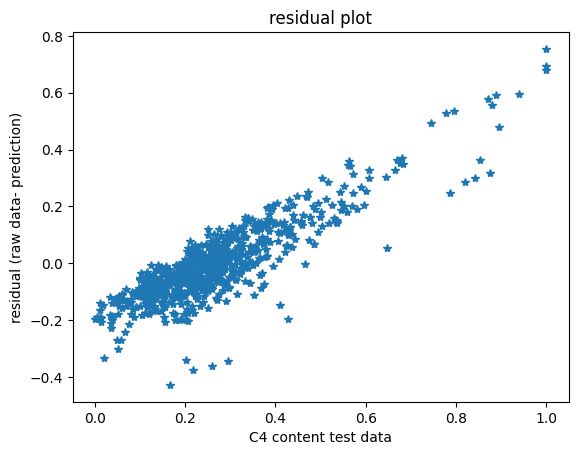

In [ ]:
# residuals
plt.figure()
plt.plot(y_test, y_test-y_test_predict, '*')
plt.xlabel('C4 content test data')
plt.ylabel('residual (raw data- prediction)')
plt.title('residual plot')

In [ ]:
# import required packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# random number seed for result reproducibility
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)

In [ ]:
# read data
data = np.loadtxt('debutanizer_data.txt', skiprows=5)

In [ ]:
# separate training, validation, and test data
from sklearn.model_selection import train_test_split
X = data[:,0:-1]
y = data[:,-1][:,np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)
X_est, X_val, y_est, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 100)

In [ ]:
#%% import packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
# define model
model = Sequential()
model.add(Dense(60, kernel_regularizer=regularizers.L1(0.0000001), activation='relu', kernel_initializer='he_normal', input_shape=(7,)))
model.add(Dense(30, kernel_regularizer=regularizers.L1(0.0000001), activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, kernel_regularizer=regularizers.L1(0.0000001)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile model
model.compile(loss='mse', optimizer=Adam(learning_rate=0.005))

In [ ]:
# fit model
es = EarlyStopping(monitor='val_loss', patience=200)
history = model.fit(X_est, y_est, epochs=2000, batch_size=32, validation_data=(X_val, y_val), callbacks=es)

Epoch 1/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0548 - val_loss: 0.0257
Epoch 2/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0212 - val_loss: 0.0220
Epoch 3/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 - val_loss: 0.0224
Epoch 4/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0180 - val_loss: 0.0217
Epoch 5/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175 - val_loss: 0.0222
Epoch 6/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0168 - val_loss: 0.0224
Epoch 7/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - val_loss: 0.0220
Epoch 8/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0156 - val_loss: 0.0218
Epoch 9/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - val_loss: 0.0211
Epoch 10/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - val_loss: 0.0210
Epoch 11/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - val_loss: 0.0204
Epoch 12/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/ste

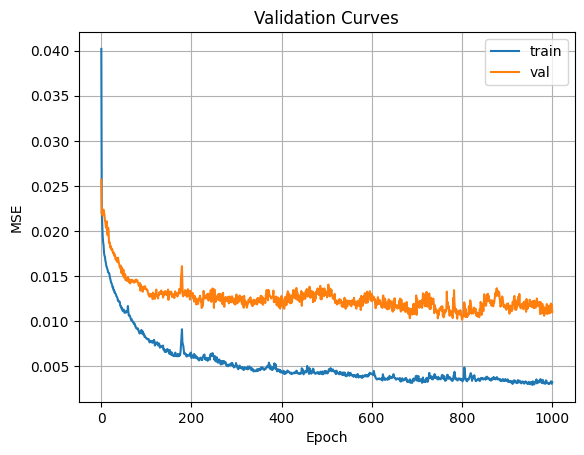

In [ ]:
# plot validation curve
plt.figure()
plt.title('Validation Curves')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# predict y
y_test_pred = model.predict(X_test)
y_val_pred = model.predict(X_val)
y_est_pred = model.predict(X_est)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


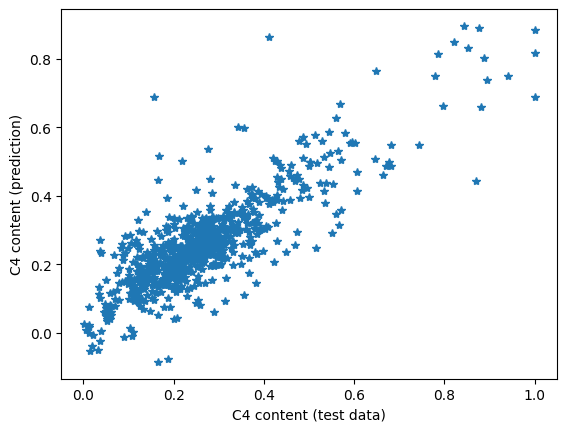

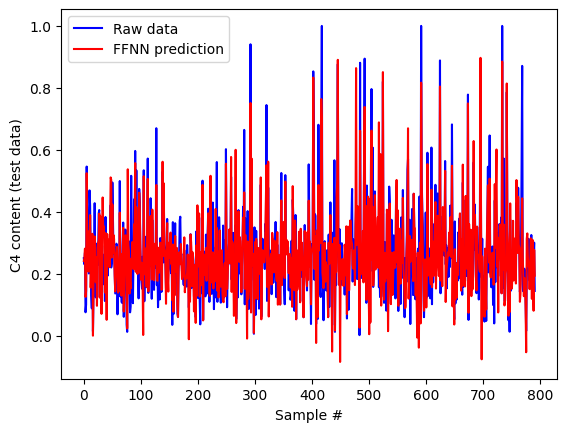

In [ ]:
# plots of raw and predicted data
plt.figure()
plt.plot(y_test, y_test_pred, '*')
plt.xlabel('C4 content (test data)')
plt.ylabel('C4 content (prediction)')

plt.figure()
plt.plot(y_test, 'b', label='Raw data')
plt.plot(y_test_pred, 'r', label='FFNN prediction')
plt.ylabel('C4 content (test data)')
plt.xlabel('Sample #')
plt.legend()

Text(0.5, 1.0, 'residual plot')

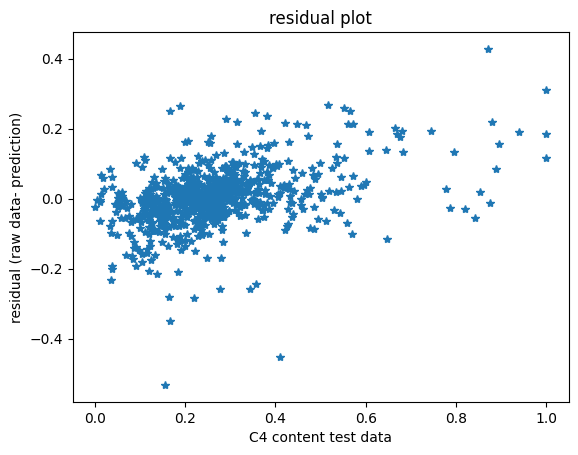

In [ ]:
# residuals
plt.figure()
plt.plot(y_test, y_test-y_test_pred, '*')
plt.xlabel('C4 content test data')
plt.ylabel('residual (raw data- prediction)')
plt.title('residual plot')

In [ ]:
# metrics
from sklearn.metrics import r2_score
print('R2 for test dataset:', r2_score(y_test, y_test_pred))
print('R2:', r2_score(y_val, y_val_pred))
print('R2:', r2_score(y_est, y_est_pred))

R2 for test dataset: 0.6880215069777147
R2: 0.6282468248412312
R2: 0.8725336079996238
